In [ ]:
# Elaborado por:
# Ana Mantilla : anagmd2019@gmail.com
# Paul Goyes : goyes.yesid@gmail.com

In [ ]:
# Clonar este notebook con el repositorio de GitHub para acceder a los datos de las variables de entrada

!git clone https://github.com/Anagabrielamantilla/MineralPrediction.git

Cloning into 'MineralPrediction'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 163 (delta 35), reused 0 (delta 0), pack-reused 96
Receiving objects: 100% (163/163), 12.65 MiB | 14.35 MiB/s, done.
Resolving deltas: 100% (55/55), done.


# **Modelo de máquinas de soporte vectorial**

<image src="https://drive.google.com/uc?export=view&id=14t_xuo49e4cjV4Dtzlkx6kMYSKfPlDZy" width=5%> **Cargar los datos**

In [ ]:
#Importar las librerías 

import pandas as pd #usada para cargar los datos delimitados por comas (.csv)
import numpy as np  #usada para extraer los valores de píxel del ráster en una matriz 
import matplotlib.pyplot as plt #usada para graficar
import seaborn as sns #usada para graficar
from sklearn import svm #usada para crear el modelo de máquinas de soporte vectorial
from sklearn.svm import SVC #usada para crear el modelo de máquinas de soporte vectorial
from sklearn.model_selection import GridSearchCV #usada para la validación cruzada
from sklearn.metrics import accuracy_score #usada para calcular la precisión
from sklearn.metrics import classification_report, confusion_matrix #usada para calcular la matriz de confusión
from sklearn.metrics import roc_curve, auc #usada para calcular el roc y auc

In [ ]:
#Importar los datos 

df=pd.read_csv('/content/MineralPrediction/Data/04_Training.csv') 

In [ ]:
# Visualizar la tabla de datos 

df.head(2)

,DEP,PC9,PC8,PC7,PC6,PC5,PC4,PC3,PC2,PC1
0,0,0.00049,-0.19757,-1.27453,1.57498,1.33215,-0.69961,-1.07609,0.28853,0.11251
1,0,-0.00048,0.10828,-0.83615,1.93379,1.45474,-1.68057,-1.19802,-0.30925,0.06977


In [ ]:
#Extraer las variables de entrada y de salida de la tabla 

y_names=['DEP']
y=df[y_names]

x_names=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
X=df[x_names]

In [ ]:
# Transformar los datos de entrada y de salida

X = X.values
y = y.values.ravel()

<image src="https://drive.google.com/uc?export=view&id=14t_xuo49e4cjV4Dtzlkx6kMYSKfPlDZy" width=5%> **Validación cruzada para determinar los hiperparámetros del modelo**

In [ ]:
# Grid de hiperparámetros

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf', 'linear','poly','sigmoid']}


# Búsqueda por validación cruzada

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, scoring='accuracy')
grid.fit(X,y)

# Resultados del grid

#Assigning a variable to the best paramaters and the classification accuracy
best_parameters_SVC = grid.best_params_
best_result_SVC = grid.best_score_

# Mejores hiperparámetros 
print("Mejores hiperparámetros encontrados (cv)")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo = grid.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

In [ ]:
# Crear el modelo 

model = svm.SVC(C = 10, kernel = 'rbf', gamma=0.1, probability=True)


In [ ]:
#Entrenar el modelo 

import time
start = time.time()
model.fit(X, y)
end = time.time()
T = end - start

In [ ]:
# Calcular la precisión del modelo

accuracy = model.score(X,y)
accuracy

0.9459459459459459

<image src="https://drive.google.com/uc?export=view&id=14t_xuo49e4cjV4Dtzlkx6kMYSKfPlDZy" width=5%> **Evaluar otras métricas con los datos de validación**

In [ ]:
# Cargar los datos de validación

val = pd.read_excel('/content/MineralPrediction/Data/Validacion.xlsx')

In [ ]:
# Extraer los datos de entrada y de salida

x_names_val = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
x_val = val[x_names_val]

y_name_val = ['DEP']
y_val = val[y_name_val]

In [ ]:
# Predecir los datos

pred_val = model.predict(x_val)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
# Cálculo del AUC y ROC

fpr_, tpr_, thresholds_ = roc_curve(y_val, pred_val)

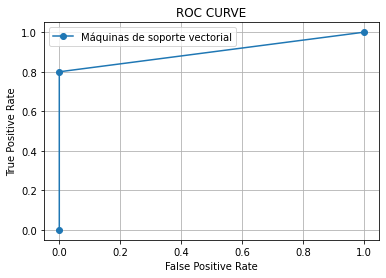

In [ ]:
plt.plot(fpr_, tpr_, marker='o', label='Máquinas de soporte vectorial')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC CURVE')
plt.grid()


In [ ]:
# AUC

from sklearn import metrics

metrics.auc(fpr_, tpr_)

0.9

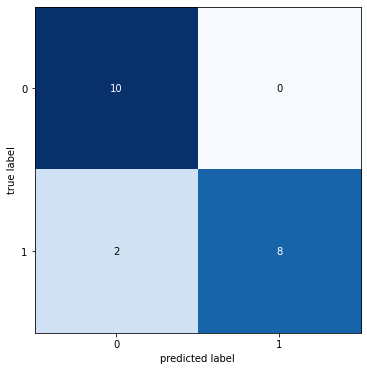

In [ ]:
# Matriz de confusión

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matriz4 = confusion_matrix(y_val, pred_val)
plot_confusion_matrix(conf_mat = matriz4, figsize = (6,6))

<image src="https://drive.google.com/uc?export=view&id=14t_xuo49e4cjV4Dtzlkx6kMYSKfPlDZy" width=5%> **Realizar la predicción con los valores del ráster virtual**

In [ ]:
# Cargar el virtual ráster que se descarga desde el link del repositorio 

import gdal

raster  = gdal.Open('/content/drive/MyDrive/TESIS/VIRTUAL-RASTER/04_Virtual_Raster.tif') # Esta ruta cambia según dónde se guardó el archivo del virtual ráster

In [ ]:
# Extraer las características del ráster

driver = raster.GetDriver()
col   = raster.RasterXSize #número de columnas
rows  = raster.RasterYSize #número de filas
nelem = col*rows  #número de píxeles

print('numero de filas: ', rows)
print('numero de columnas: ', col)

numero de filas:  1261
numero de columnas:  1333


In [ ]:
# Guardar las posiciones NonData del ráster. Solo se hace una vez para cualquier banda
# ya que las posiciones de Nonvalue deben ser las mismas para todas las bandas

Nonvalue = raster.GetRasterBand(1).GetNoDataValue()

In [ ]:
#Extraer los valores de cada banda

v1val = raster.GetRasterBand(1).ReadAsArray().flatten()
v2val = raster.GetRasterBand(2).ReadAsArray().flatten()
v3val = raster.GetRasterBand(3).ReadAsArray().flatten()
v4val = raster.GetRasterBand(4).ReadAsArray().flatten()
v5val = raster.GetRasterBand(5).ReadAsArray().flatten()
v6val = raster.GetRasterBand(6).ReadAsArray().flatten()
v7val = raster.GetRasterBand(7).ReadAsArray().flatten()
v8val = raster.GetRasterBand(8).ReadAsArray().flatten()
v9val = raster.GetRasterBand(9).ReadAsArray().flatten()

# Agrupar los valores tal que se forme una matriz de N X 9
# donde N es el número de muestras

DATA = np.stack((v1val,v2val,v3val,v4val,v5val,v6val,v7val,v8val,v9val), axis=1)

# Organizar los datos y eliminar las posiciones de NonData

NanValues = np.where(v1val == Nonvalue)[0]
cP        = np.arange(0,nelem)
cPP       = np.delete(cP, NanValues, axis=0)

XX = np.delete(DATA, NanValues, axis=0)

In [ ]:
# Predecir los valores con el modelo entrenado

y_raster = model.predict(XX)

In [ ]:
# Crear nuevamente el formato de datos para llevarlo al raster. 
# Usaremos una variable nueva llena de zeros, en la cual insertaremos los NonValues y los valores de la predicción.
# el tamaño de esta variable será el mismo que el raster

Rasterdataarray = np.zeros((rows,col)).flatten()

# cPP contiene las posiciones donde van las predicciones
for i in range(cPP.shape[0]):
    Rasterdataarray[cPP[i]]=y_raster[i]
    
# NanValues contiene las posiciones donde van los NOnValues    
for i in range(NanValues.shape[0]):
    Rasterdataarray[NanValues[i]]=Nonvalue


# guardar la predicción en un raster con las mismas caracteristicas del raster input

Rasterout = driver.Create('/content/drive/MyDrive/TESIS/MAPAS-PROBABILIDAD/04_Maquinas_Soporte_Vectorial.tif', col, rows, 1, gdal.GDT_Float32) #esta ruta se modifica según donde desee que se guarde el mapa de probabilidad en su Google Drive
# Write metadata
Rasterout.SetGeoTransform(raster.GetGeoTransform())
Rasterout.SetProjection(raster.GetProjection())

Rasterout.GetRasterBand(1).WriteArray(Rasterdataarray.reshape(rows,col))
Rasterout.GetRasterBand(1).SetNoDataValue(Nonvalue)
Rasterout = None
del Rasterout

<image src="https://drive.google.com/uc?export=view&id=14t_xuo49e4cjV4Dtzlkx6kMYSKfPlDZy" width=5%> **Visualizar el mapa de probabilidad**

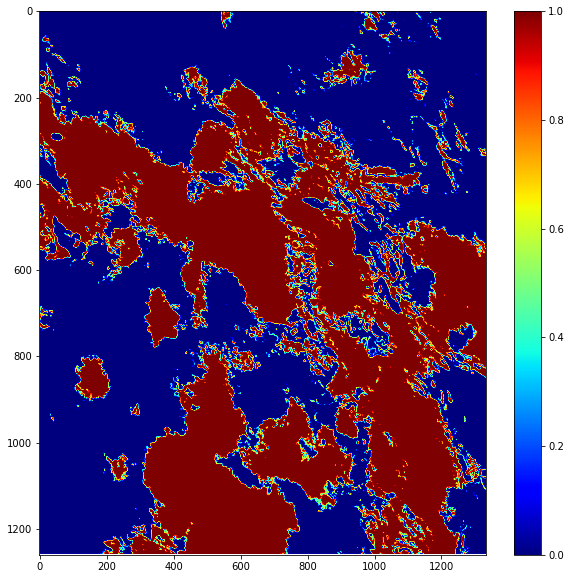

In [ ]:
temp1 = Rasterdataarray.copy()
temp1[temp1==Nonvalue] = None

plt.figure(figsize=(10,10))
plt.imshow(   temp1.reshape((rows,col)), aspect='auto',cmap='jet', vmin=0, vmax=1)
plt.colorbar()

# **Créditos**
---

* **Autores:** 
  * [Ana Gabriela Mantilla, Geóloga](https://www.linkedin.com/in/ana-gabriela-mantilla-24377a21a)
  * [Paul Goyes Peñafiel, PhD (c)](https://www.linkedin.com/in/paul-goyes-0212b810/)

# **Forma de citar**

* Mantilla, A. (2023). Predicción de la ocurrencia de depósitos tipo pórfido usando técnicas de aprendizaje automático [Tesis de pregrado inédita]. Universidad Industrial de Santander.


*Este código se encuentra protegido bajo una licencia de libre acceso. Se permite su distribución y/o modificación, siempre y cuando se consideren los créditos correspondientes. Los autores no se hacen responsables del uso de los códigos por parte de terceros.*